In [10]:
import torch
DATA = 'SVHN'
prefix = 'svhn_bnn_'
traing = True
epochs = 400
batch_size = 64
leaks_loss = None
print(torch.cuda.get_device_name(0))

Tesla P100-PCIE-16GB


In [2]:
import os
from google.colab import drive

drive.mount('/content/gdrive')
root_path = '/content/gdrive/MyDrive/Colab Notebooks/BinarizeLocalize/'

Mounted at /content/gdrive


In [3]:
pip install import-ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp37-none-any.whl size=2976 sha256=f83d8f479e4a281e46df7e0d5bdef7796a7d0e07be6de2215f3a4907d1129ac6
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [4]:
import import_ipynb
os.chdir(root_path + 'library')
Call_Template = True
%run Template.ipynb

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


##Fetching the dataset and preparing train, validation and test data loaders

In [5]:
(trainSet, validSet, checkSet, testSet,
 trainSetGPU, validSetGPU, checkSetGPU) = load_data_to_gpu()
print(len(trainSet), len(validSet), len(checkSet), len(testSet))

Using downloaded and verified file: /content/gdrive/MyDrive/Colab Notebooks/BinarizeLocalize/data/train_32x32.mat
Using downloaded and verified file: /content/gdrive/MyDrive/Colab Notebooks/BinarizeLocalize/data/test_32x32.mat



73257 18222 7810 26032


##Visualising the data

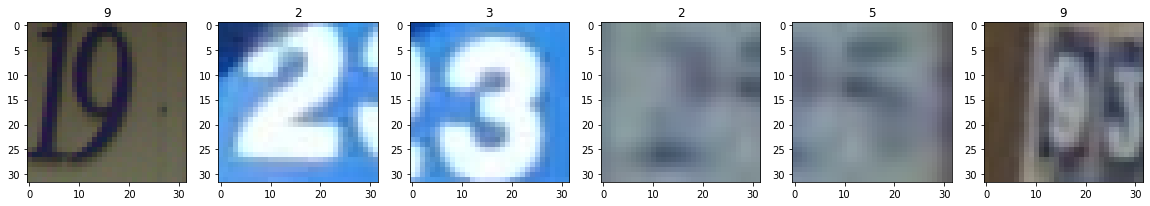

In [6]:
plot_samples(trainSet, None)

In [7]:
class Network(Model):
    def __init__(self):
        super(Network, self).__init__()
        # at client
        self.feature0 = nn.Sequential(
            BinaryConv2d(3, 6, 5, 1, 1), #28
            nn.BatchNorm2d(6),
            BinaryTanh(),
        )
        self.feature1 = nn.Sequential(
            nn.MaxPool2d(2), #14
            #nn.Dropout(0.1),
        )
        # at server
        self.feature2 = nn.Sequential(
            BinaryConv2d(6, 16, 5, 1, 0), #10
            nn.BatchNorm2d(16),
            BinaryTanh(),
            nn.MaxPool2d(2), #5
            #nn.Dropout(0.2),
        )
        self.classifier = nn.Sequential(
            BinaryLinear(25 * 16, 120),
            nn.BatchNorm1d(120),
            BinaryTanh(),
            #nn.Dropout(0.3),
            BinaryLinear(120, 84),
            nn.BatchNorm1d(84),
            BinaryTanh(),
            #nn.Dropout(0.2),
            BinaryLinear(84, 10)
        )

##Defining model object, loss function and optimiser

In [8]:
(model, criterion, dataleaks, optimizer) = init_training(Network())

##Training and Validation

In [11]:
(trainLoss, validLoss, leaksLoss, accuracyList) = train_model(2)

Saving the model state dictionary for Epoch: 1 with Validation loss: 6.81186962 and Accuracy: 18.81%
Saving the model state dictionary for Epoch: 2 with Validation loss: 6.06772327 and Accuracy: 35.54%
Saving the model state dictionary for Epoch: 3 with Validation loss: 4.81066799 and Accuracy: 40.08%
Saving the model state dictionary for Epoch: 7 with Validation loss: 3.07765198 and Accuracy: 51.98%
Saving the model state dictionary for Epoch: 9 with Validation loss: 2.98695827 and Accuracy: 56.68%
Saving the model state dictionary for Epoch: 16 with Validation loss: 2.86225152 and Accuracy: 64.25%
Saving the model state dictionary for Epoch: 30 with Validation loss: 2.56530619 and Accuracy: 67.08%
Saving the model state dictionary for Epoch: 38 with Validation loss: 2.53946877 and Accuracy: 68.91%
Saving the model state dictionary for Epoch: 41 with Validation loss: 2.41829491 and Accuracy: 68.86%
Updating learning rate as [0.0005, 0.0005, 0.0005, 0.0005]
Saving the model state dicti

In [12]:
(model, trainLoss, validLoss, leaksLoss, accuracyList) = save_and_load()

Max accuracy is tensor(0.7400, device='cuda:0')


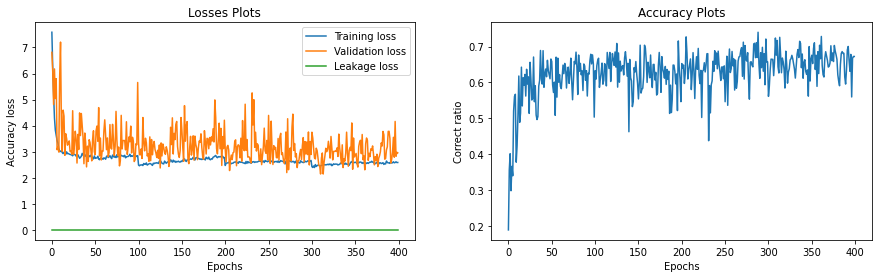

In [13]:
plot_losses()


Test accuracy: 0.7220230473751601


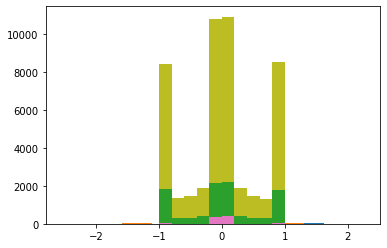

In [14]:
test_model()

##Measuring Privacy Preserving

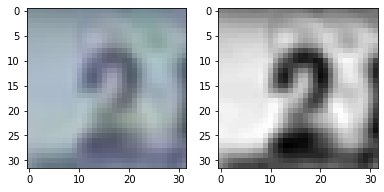

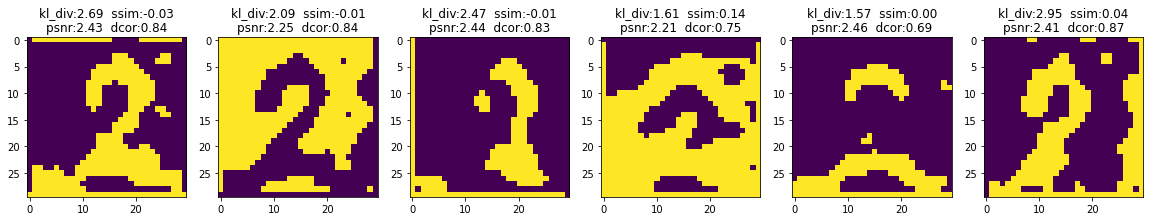

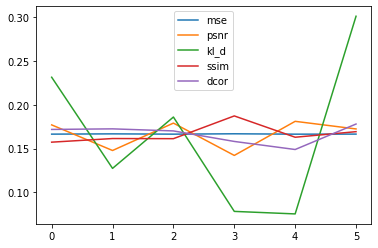

In [15]:
plot_measure(measure_image(testSet[1][0]))